[테스트 스크립트] 프로젝트 루트가 sys.path에 추가됨: /home/jwchoi/UVS
[테스트 스크립트] 현재 sys.path (일부): ['/home/jwchoi/UVS', '/home/jwchoi/anaconda3/envs/UVS/lib/python39.zip', '/home/jwchoi/anaconda3/envs/UVS/lib/python3.9', '/home/jwchoi/anaconda3/envs/UVS/lib/python3.9/lib-dynload', '']...

[테스트 스크립트] file_loaders에서 테이블 임포트 시도...
[테스트 스크립트] file_loaders에서 테이블 임포트 성공!

[테스트 스크립트] 로드된 테이블 타입 및 비어있는지 여부 확인:
[테스트 스크립트] FC_TABLE: 로드 성공 (타입: <class 'pandas.core.frame.DataFrame'>, 비어있지 않음). Shape: (19, 19)
[테스트 스크립트] VW_TABLE: 로드 성공 (타입: <class 'pandas.core.frame.DataFrame'>, 비어있지 않음). Shape: (21, 21)
[테스트 스크립트] LC_TABLE: 로드 성공 (타입: <class 'pandas.core.frame.DataFrame'>, 비어있지 않음). Shape: (27, 27)
[테스트 스크립트] CV_TABLE: 로드 성공 (타입: <class 'pandas.core.frame.DataFrame'>, 비어있지 않음). Shape: (27, 19)

[테스트 스크립트] hangul_DTW 함수 및 예외 클래스 임포트 시도...
[테스트 스크립트] hangul_DTW 및 예외 클래스 임포트 성공!


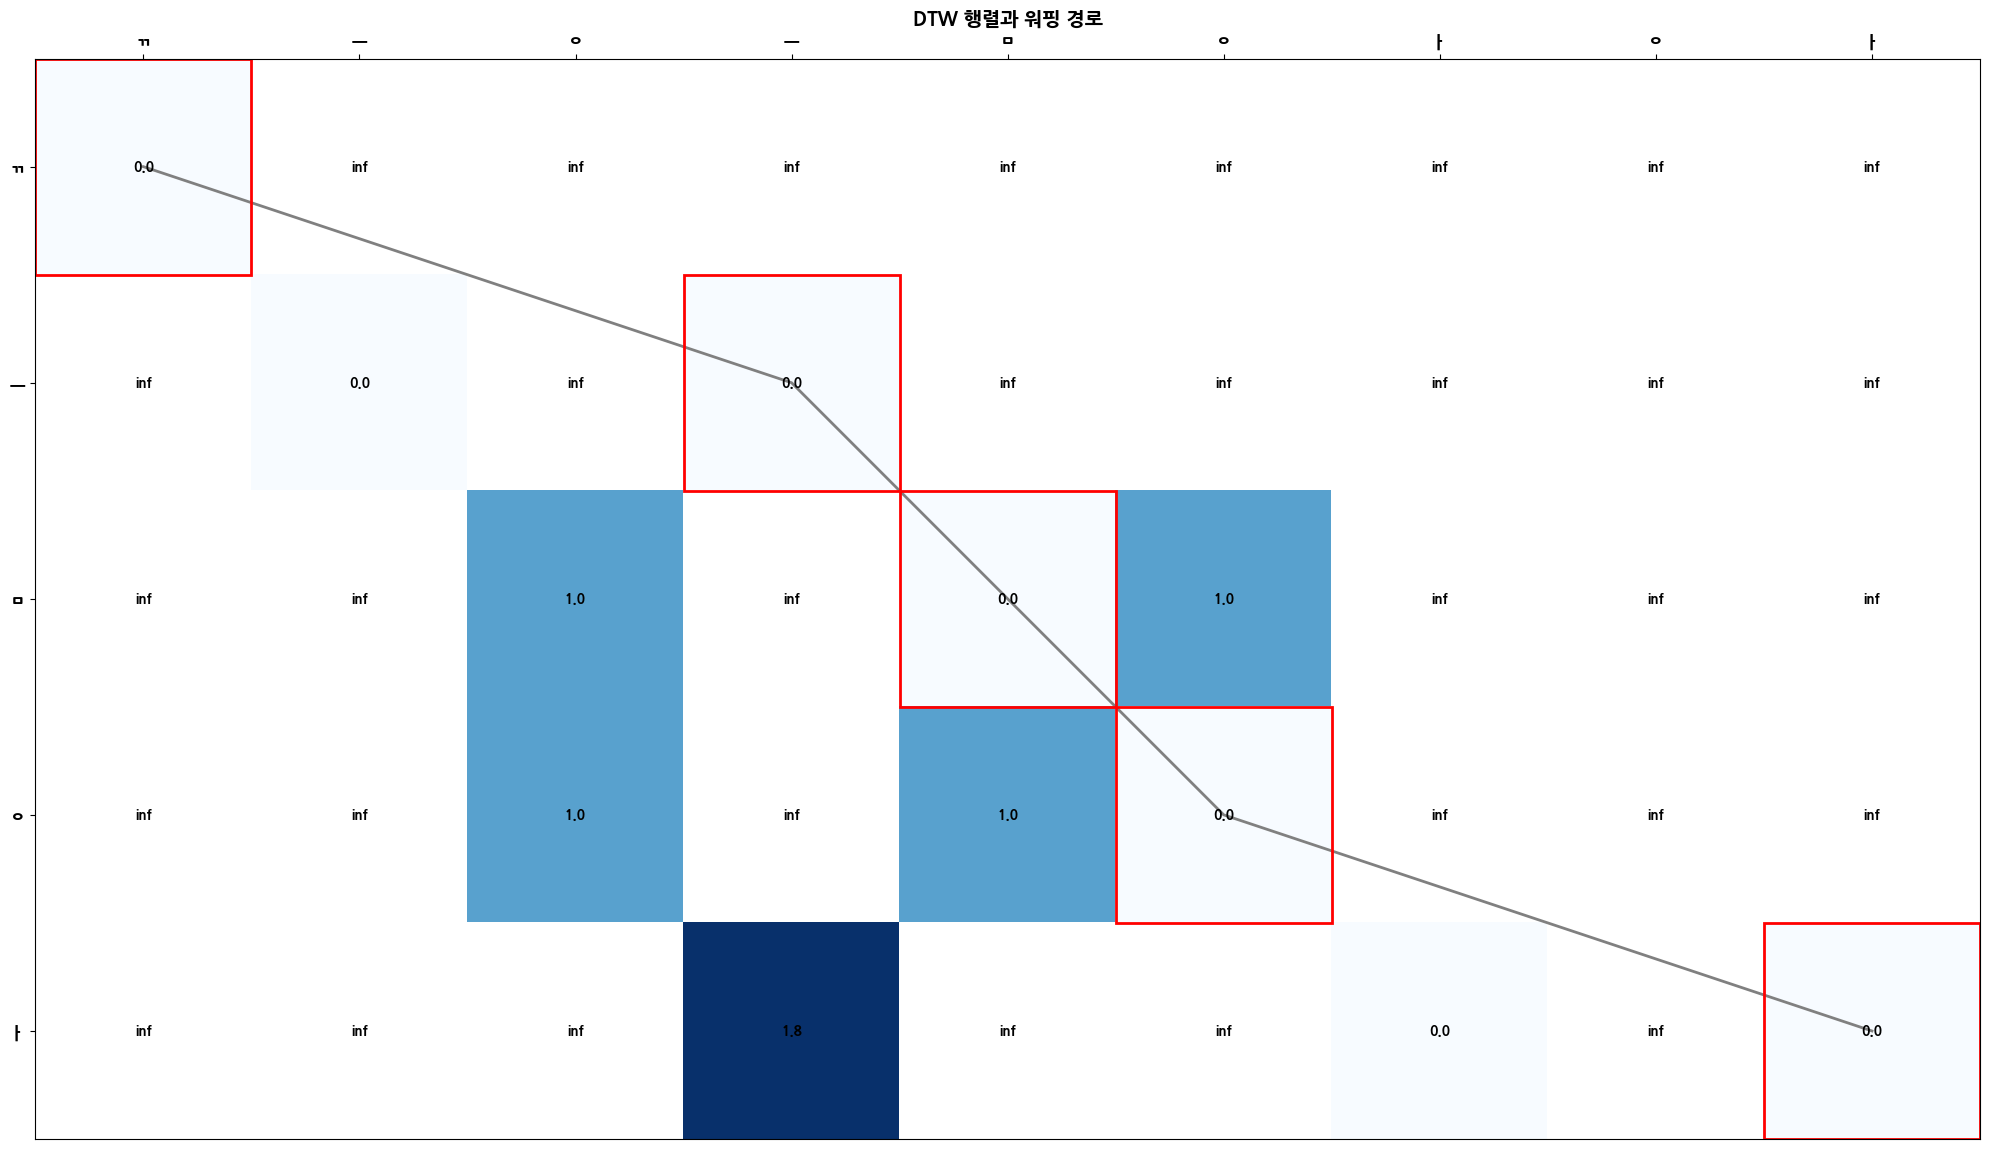


자모 정렬:
'ᄁ' (끔) -> 'ᄁ' (끄)
'ᅳ' (끔) -> 'ᅳ' (끄)
          -> 'ᄋ' (음)
          -> 'ᅳ' (음)
'ᆷ' (끔) -> 'ᆷ' (음)
'ᄋ' (아) -> 'ᄋ' (아)
'ᅡ' (아) -> 'ᅡ' (아)
          -> 'ᄋ' (아)
          -> 'ᅡ' (아)


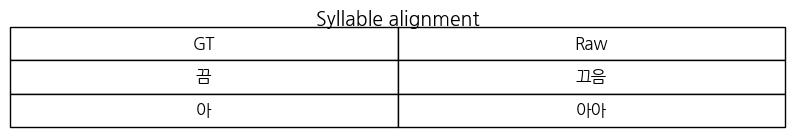


--- hangul_DTW 함수 반환 결과 (요약) ---
DTW 행렬 크기: (6, 10)
최종 DTW 비용: 0.0
경로 길이: 5


In [1]:
import sys
import os
import pandas as pd
%matplotlib inline

# 프로젝트 루트 경로 설정
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"[테스트 스크립트] 프로젝트 루트가 sys.path에 추가됨: {project_root}")
print(f"[테스트 스크립트] 현재 sys.path (일부): {sys.path[:5]}...")

try:
    print("\n[테스트 스크립트] file_loaders에서 테이블 임포트 시도...")
    from hangul_dtw.utils.file_loaders import FC_TABLE, VW_TABLE, LC_TABLE, CV_TABLE
    print("[테스트 스크립트] file_loaders에서 테이블 임포트 성공!")

    print("\n[테스트 스크립트] 로드된 테이블 타입 및 비어있는지 여부 확인:")
    tables_to_check = {
        "FC_TABLE": FC_TABLE,
        "VW_TABLE": VW_TABLE,
        "LC_TABLE": LC_TABLE,
        "CV_TABLE": CV_TABLE
    }
    all_tables_loaded_correctly = True
    for name, table_df in tables_to_check.items():
        if isinstance(table_df, pd.DataFrame) and not table_df.empty:
            print(f"[테스트 스크립트] {name}: 로드 성공 (타입: {type(table_df)}, 비어있지 않음). Shape: {table_df.shape}")
        else:
            print(f"[테스트 스크립트] 오류: {name}이 올바르게 로드되지 않았습니다. 타입: {type(table_df)}, 비어있음: {table_df.empty if isinstance(table_df, pd.DataFrame) else 'N/A'}")
            all_tables_loaded_correctly = False
    
    if not all_tables_loaded_correctly:
        print("[테스트 스크립트] 하나 이상의 데이터 테이블 로드에 실패했습니다. file_loaders.py의 디버깅 메시지를 확인하세요.")
        sys.exit(1)

    print("\n[테스트 스크립트] hangul_DTW 함수 및 예외 클래스 임포트 시도...")
    from hangul_dtw import hangul_DTW
    from hangul_dtw.exceptions import (
        EmptyHangulInputError,
        DTWCalculationError,
        MappingError,
        CharUtilsError,
        HangulDTWError
    )
    print("[테스트 스크립트] hangul_DTW 및 예외 클래스 임포트 성공!")

except ImportError as e:
    print(f"\n[테스트 스크립트] 임포트 오류: {e}")
    print("원인: sys.path 설정이 잘못되었거나, __init__.py 파일 누락, 또는 file_loaders.py 내부에서 테이블 로드 실패 후 ImportError가 다시 발생했을 수 있습니다.")
    print("file_loaders.py 내부의 '[DEBUG file_loaders]' 메시지를 확인하여 테이블 로드 과정을 추적하세요.")
    if "Failed to load one or more essential data tables" in str(e):
        print("특히, 데이터 테이블 로드에 실패한 것으로 보입니다. 데이터 파일 경로와 접근 권한을 확인하세요.")
    sys.exit(1)
except Exception as e:
    print(f"\n[테스트 스크립트] 테이블 로드 또는 임포트 중 예기치 않은 오류: {type(e).__name__} - {e}")
    import traceback
    traceback.print_exc()
    sys.exit(1)

# 테스트할 입력 문자열
gt_text = "끔 아"
raw_text = "끄음 아아"
#gt_text = " 나는 혼자서 모든 해내는 멋진 아이랍니다."
#raw_text = "나아느은호온자아서어머어드은해에내에느은머엇찐아이라암니이다아"

try:
    dtw_matrix, path, jamo_alignments, syllable_mapping = hangul_DTW(
        gt_text=gt_text,
        raw_text=raw_text,
        print_matrix=True,
        print_align=True,
        multi=True
    )

    print("\n--- hangul_DTW 함수 반환 결과 (요약) ---")
    if dtw_matrix is not None and dtw_matrix.size > 0:
        print(f"DTW 행렬 크기: {dtw_matrix.shape}")
        final_cost = dtw_matrix[-1, -1] if dtw_matrix.shape[0] > 0 and dtw_matrix.shape[1] > 0 else "N/A (빈 행렬)"
        print(f"최종 DTW 비용: {final_cost}")
    else:
        print("DTW 행렬이 비어있거나 유효하지 않습니다.")

    print(f"경로 길이: {len(path) if path is not None else 'N/A'}")

except EmptyHangulInputError as e:
    print(f"\n[입력 오류 발생] 파일: {e.filename}, 코드: {e.error_code}")
    print(f"메시지: {str(e)}")
except DTWCalculationError as e:
    print(f"\n[DTW 계산 오류 발생] 파일: {e.filename if hasattr(e, 'filename') else 'N/A'}")
    print(f"메시지: {str(e)}")
    if hasattr(e, 'details') and e.details: print(f"상세 정보: {e.details}")
except MappingError as e:
    print(f"\n[매핑 오류 발생] 파일: {e.filename if hasattr(e, 'filename') else 'N/A'}")
    print(f"메시지: {str(e)}")
    if hasattr(e, 'details') and e.details: print(f"상세 정보: {e.details}")
except CharUtilsError as e:
    print(f"\n[자모 처리 오류 발생] 함수: {e.function_name if hasattr(e, 'function_name') else 'N/A'}, 입력: {e.char_input if hasattr(e, 'char_input') else 'N/A'}")
    print(f"메시지: {str(e)}")
except HangulDTWError as e:
    print(f"\n[패키지 오류 발생] {type(e).__name__}")
    print(f"메시지: {str(e)}")
except Exception as e:
    print(f"\n[예기치 않은 오류 발생] {type(e).__name__}")
    print(f"메시지: {str(e)}")    
    import traceback
    traceback.print_exc()

In [29]:
from jamo import h2j
from hangul_dtw.core.cost_calculator import find_max_offset

def map_origin_index(origin_index, raw_jamo_seq, raw_jamo_seq_with_space) -> int:
    if not (0 <= origin_index < len(raw_jamo_seq)):
        raise IndexError(
            f"origin_index {origin_index} is out of bounds for raw_jamo_seq of length {len(raw_jamo_seq)}"
        )

    non_space_elements_encountered = 0
    for current_idx_in_spaced_seq, element in enumerate(raw_jamo_seq_with_space):
        if element != ' ':  # Assuming ' ' represents a space
            if non_space_elements_encountered == origin_index:
                # This non-space element in raw_jamo_seq_with_space corresponds to
                # raw_jamo_seq[origin_index].
                return current_idx_in_spaced_seq
            non_space_elements_encountered += 1
            
    raise ValueError(
        f"Failed to map origin_index {origin_index}. "
        f"raw_jamo_seq_with_space may not have enough non-space elements "
        f"corresponding to raw_jamo_seq. "
        f"Expected at least {origin_index + 1} non-space elements in raw_jamo_seq_with_space, "
        f"but only {non_space_elements_encountered} were found before matching."
    )

text = "끔 아"
text2 = "끄음 아"

jamo_seq = h2j(text)
jamo_seq_with_space = h2j(text2)

print(find_max_offset(jamo_seq, 4, jamo_seq_with_space, 7))

#print(map_origin_index(8, jamo_seq, jamo_seq_with_space))
#print(map_origin_index(7, jamo_seq, jamo_seq_with_space))
#print(map_origin_index(8, jamo_seq, jamo_seq_with_space))

(1, 1)
